In [1]:
import os
import pandas as pd


In [2]:
df=pd.read_csv('/home/l3x/Documents/IDENTIFICATION/avion/id_real/data/ulg/log_9_2020-12-2-15-08-32_sensor_combined_0.csv')

In [3]:
df

,timestamp,gyro_rad[0],gyro_rad[1],gyro_rad[2],gyro_integral_dt,accelerometer_timestamp_relative,accelerometer_m_s2[0],accelerometer_m_s2[1],accelerometer_m_s2[2],accelerometer_integral_dt
0,273391065,0.001833,-0.001448,-0.002399,3976,0,1.200100,0.418796,-9.518464,3976
1,273395072,0.008264,-0.001845,-0.003202,4007,0,1.113961,0.443017,-10.008203,4007
2,273399083,0.010207,0.000796,-0.003725,4011,0,0.896037,0.269318,-9.502034,4011
3,273403074,-0.005668,0.000519,-0.002903,3991,0,1.146212,0.280445,-9.832887,3991
4,273407104,-0.011078,-0.002512,-0.003730,4030,0,1.038462,0.234933,-9.328155,4030
...,...,...,...,...,...,...,...,...,...,...
21365,364288671,-0.030099,0.176848,-0.194921,4007,0,2.833884,3.148391,-11.410969,4007
21366,364292678,0.021526,0.097697,-0.195954,4007,0,0.604670,2.428076,-8.153979,4007
21367,364296665,-0.027916,0.165470,-0.185788,3987,0,2.786080,3.075061,-11.388835,3987
21368,364300690,0.023964,0.107271,-0.192757,4025,0,0.582432,2.513577,-7.797128,4025


In [4]:
df=df.drop(columns=[i for i in df.keys() if ('gyro' not in i)*("timestamp" not in i)])

In [5]:
t=df.timestamp.values/1e6-df.timestamp.values[0]/1e6

In [6]:
t

array([0.0000000e+00, 4.0070000e-03, 8.0180000e-03, ..., 9.0905600e+01,
       9.0909625e+01, 9.0913599e+01])

In [7]:
from pylab import *

In [8]:
tp,tm=r_[array([0]),t],r_[t,array([0])]

In [9]:
dt=tm-tp
dt=dt[1:]

In [10]:
dt

array([ 4.0070000e-03,  4.0110000e-03,  3.9910000e-03, ...,
        4.0250000e-03,  3.9740000e-03, -9.0913599e+01])

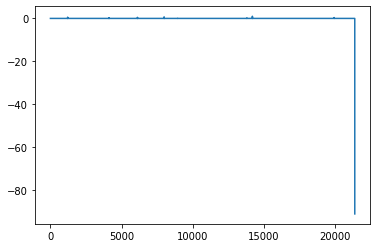

In [11]:
plot(dt)

In [12]:
dx=df['gyro_rad[0]'].values
dy=df['gyro_rad[1]'].values
dz=df['gyro_rad[2]'].values

In [13]:
dx=(r_[dx,array([0])]-r_[array([0]),dx])[:-1]
dy=(r_[dy,array([0])]-r_[array([0]),dy])[:-1]
dz=(r_[dz,array([0])]-r_[array([0]),dz])[:-1]

In [14]:
dx.shape

(21370,)

In [15]:
angax=pd.DataFrame([],columns=['timestamp',"domex","domey","domez"])
angax["timestamp"]=df.timestamp.values
# angax["domex"]=dx/dt
# angax["domey"]=dy/dt
# angax["domez"]=dz/dt

In [16]:
kt=10

def filtering(x,kt=0.05):
    x_filt=[x[0]]
    for i in range(len(x)-1):
        x_filt.append(x_filt[-1]+kt*(x[i]-x_filt[-1]))
    return array(x_filt)


dx=filtering(df['gyro_rad[0]'].values)
dy=filtering(df['gyro_rad[1]'].values)
dz=filtering(df['gyro_rad[2]'].values)

dx=(r_[dx,array([0])]-r_[array([0]),dx])[:-1]
dy=(r_[dy,array([0])]-r_[array([0]),dy])[:-1]
dz=(r_[dz,array([0])]-r_[array([0]),dz])[:-1]

angax["domex"]=dx/dt
angax["domey"]=dy/dt
angax["domez"]=dz/dt

In [17]:
angvel=pd.DataFrame([],columns=['timestamp',"omex","omey","omez"])
angvel["timestamp"]=df.timestamp.values
angvel["omex"]=filtering(df['gyro_rad[0]'].values)
angvel["omey"]=filtering(df['gyro_rad[1]'].values)
angvel["omez"]=filtering(df['gyro_rad[2]'].values)

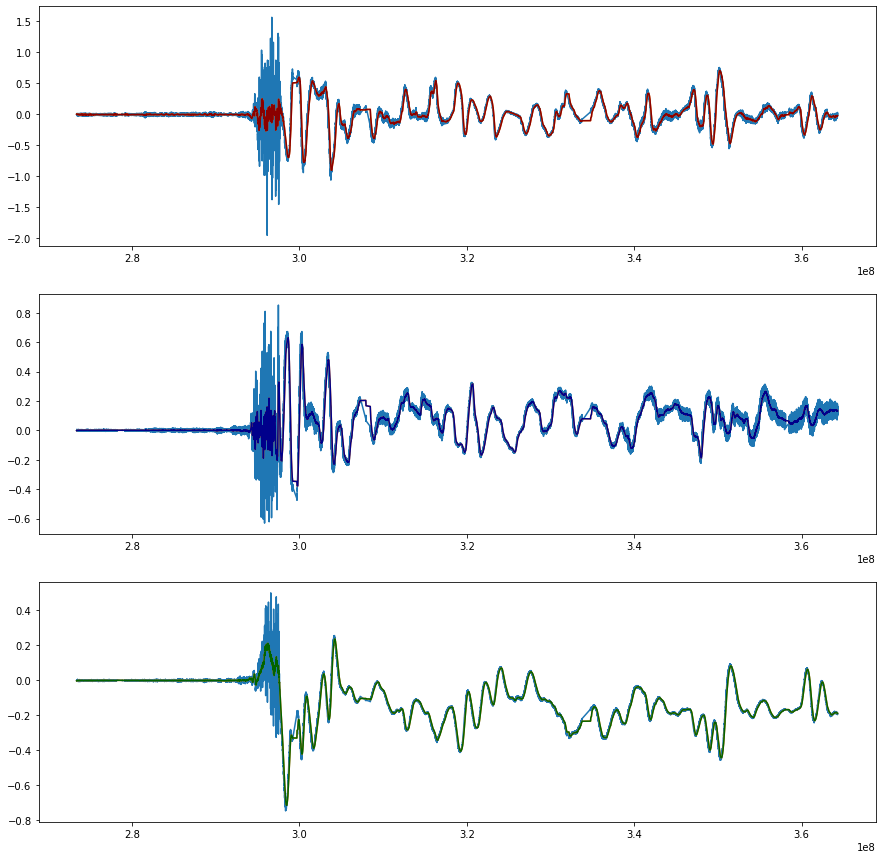

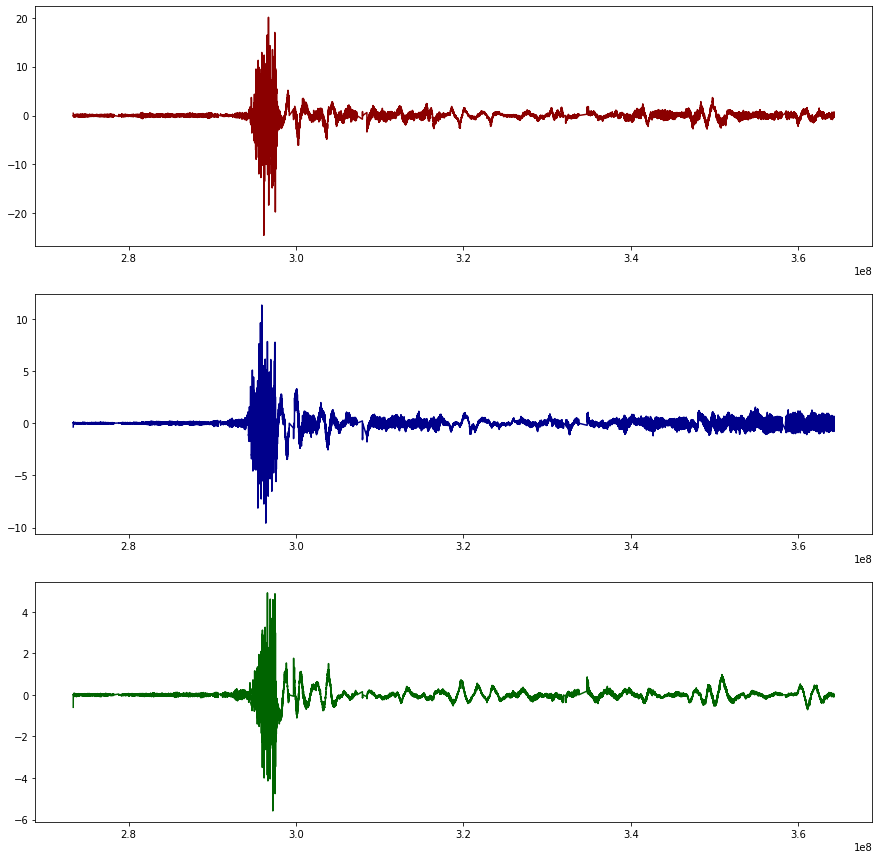

In [18]:
figure(figsize=(15,15))
gcf().add_subplot(311)
plot(df['timestamp'],df['gyro_rad[0]'])
plot(df['timestamp'],filtering(df['gyro_rad[0]'].values))
plot(df['timestamp'],cumsum(dt*angax['domex']),color="darkred")
# plot(angax['timestamp'],cumsum(dt*angax['domex_filt']),color="red")

gcf().add_subplot(312)

plot(df['timestamp'],df['gyro_rad[1]'])
plot(df['timestamp'],filtering(df['gyro_rad[1]'].values))
plot(angax['timestamp'],cumsum(dt*angax['domey']),color="darkblue")
# plot(angax['timestamp'],cumsum(dt*angax['domey_filt']),color="blue")

gcf().add_subplot(313)
plot(df['timestamp'],df['gyro_rad[2]'])
plot(df['timestamp'],filtering(df['gyro_rad[2]'].values))
plot(angax['timestamp'],cumsum(dt*angax['domez']),color="darkgreen")
# plot(angax['timestamp'],cumsum(dt*angax['domez_filt']),color="green")


figure(figsize=(15,15))
gcf().add_subplot(311)
plot(angax['timestamp'],angax['domex'],color="darkred")
# plot(angax['timestamp'],angax['domex_filt'],color="red")
gcf().add_subplot(312)

plot(angax['timestamp'],angax['domey'],color="darkblue")
# plot(angax['timestamp'],angax['domey_filt'],color="blue")
gcf().add_subplot(313)

plot(angax['timestamp'],angax['domez'],color="darkgreen")
# plot(angax['timestamp'],angax['domez_filt'],color="green")



In [20]:
angax['xyz[0]']=angax['domex']
angax['xyz[1]']=angax['domey']
angax['xyz[2]']=angax['domez']
angvel['xyz[0]']=angvel['omex']
angvel['xyz[1]']=angvel['omey']
angvel['xyz[2]']=angvel['omez']
angax.to_csv('angular_acceleration_0.csv')
angvel.to_csv('angular_velocity_0.csv')